In [170]:
"""Assignment: Create a vector layer out of the Raw data of the Drought of Bangladesh, classify the drought
data according to the Drought class/intensity and add a background map to locate the position of 
various drought data. """ 






import pandas as pd
from simpledbf import Dbf5
import matplotlib.pyplot as plt
import geopandas as gpd

In [156]:
# Read the Drought data that is in .dbf file format


data = gpd.read_file("bgd_nhr_drought_sparsso.dbf")
data

# Notice that the value of the all emtries for the column 'geometry' is None

,AREA,PERIMETER,DD_TM_,DD_TM_ID,GEOCODE,THANANAME,DROU_CLASS,DROUGHT_CL,THANA_NAME,AREA_SQKM,geometry
0,90394100.0,65584.950,2,13135,57790,Tentulia,3,Moderate,TENTULIA,196.73,None
1,1440360.0,4800.594,3,13132,57790,Tentulia,10,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TENTULIA,196.73,None
2,24956400.0,25367.530,4,13134,57790,Tentulia,2,Severe,TENTULIA,196.73,None
3,24473100.0,25712.760,5,13133,57790,Tentulia,3,Moderate,TENTULIA,196.73,None
4,14474800.0,23933.420,6,13131,57790,Tentulia,2,Severe,TENTULIA,196.73,None
...,...,...,...,...,...,...,...,...,...,...,...
12567,624666.6,3146.267,12569,6,22290,Teknaf,4,Slight,TEKNAF,3.86,None
12568,810528.4,3752.297,12570,5,22290,Teknaf,11,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TEKNAF,3.86,None
12569,671499.6,3209.002,12571,2,22290,Teknaf,1,Very Severe,TEKNAF,3.86,None
12570,509281.7,3314.200,12572,3,22290,Teknaf,11,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TEKNAF,3.86,None


In [157]:
# Delete the column 'geometry'

data = data.drop(['geometry'],axis =1)

In [130]:
# Raed a sample .dbf file of Bangladesh boundary. In which, the entities of the 'geometry column is not None.

bd = gpd.read_file("bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm4_bbs_20201113.dbf")
bd

,Shape_Leng,Shape_Area,ADM4_EN,ADM4_PCODE,ADM4_REF,ADM4ALT1EN,ADM4ALT2EN,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,0.286382,0.001944,Abaipur,BD40448010,None,None,None,Shailkupa,BD404480,Jhenaidah,BD4044,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.29995 23.62161, 89.30005 23.62142..."
1,0.098597,0.000317,Abdullahpur,BD30599411,None,None,None,Tongibari,BD305994,Munshiganj,BD3059,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.48251 23.55370, 90.48244 23.55351..."
2,0.170051,0.001055,Abdullapur,BD10092513,None,None,None,Char Fasson,BD100925,Bhola,BD1009,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.70433 22.15793, 90.70435 22.15791..."
3,0.055861,0.000172,Abdullapur,BD20153311,None,None,None,Fatikchhari,BD201533,Chittagong,BD2015,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((91.87498 22.57881, 91.87495 22.57865..."
4,0.312536,0.002235,Abdulpur,BD40507916,None,None,None,Kushtia Sadar,BD405079,Kushtia,BD4050,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.11685 23.76863, 89.11678 23.76841..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,0.183640,0.001056,Zanjira Paurashava,BD30869499,None,None,None,Zanjira,BD308694,Shariatpur,BD3086,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.31593 23.35038, 90.31599 23.35031..."
5156,0.249771,0.002037,Zianagar,BD50103381,None,None,None,Dhupchanchia,BD501033,Bogra,BD5010,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.10699 24.97027, 89.10701 24.97027..."
5157,0.349076,0.002370,Zindarpur,BD50385895,None,None,None,Kalai,BD503858,Joypurhat,BD5038,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.20917 25.01506, 89.20911 25.01486..."
5158,0.077289,0.000216,Zinjira,BD30263894,None,None,None,Keraniganj,BD302638,Dhaka,BD3026,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.39317 23.71109, 90.39354 23.71121..."


In [158]:
# Recreate the column 'geometry' for the Drought data that has copied the values of the 'geometry column of the bd data.

data["geometry"]=bd["geometry"]
data


,AREA,PERIMETER,DD_TM_,DD_TM_ID,GEOCODE,THANANAME,DROU_CLASS,DROUGHT_CL,THANA_NAME,AREA_SQKM,geometry
0,90394100.0,65584.950,2,13135,57790,Tentulia,3,Moderate,TENTULIA,196.73,"POLYGON ((89.29995 23.62161, 89.30005 23.62142..."
1,1440360.0,4800.594,3,13132,57790,Tentulia,10,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TENTULIA,196.73,"POLYGON ((90.48251 23.55370, 90.48244 23.55351..."
2,24956400.0,25367.530,4,13134,57790,Tentulia,2,Severe,TENTULIA,196.73,"POLYGON ((90.70433 22.15793, 90.70435 22.15791..."
3,24473100.0,25712.760,5,13133,57790,Tentulia,3,Moderate,TENTULIA,196.73,"POLYGON ((91.87498 22.57881, 91.87495 22.57865..."
4,14474800.0,23933.420,6,13131,57790,Tentulia,2,Severe,TENTULIA,196.73,"POLYGON ((89.11685 23.76863, 89.11678 23.76841..."
...,...,...,...,...,...,...,...,...,...,...,...
12567,624666.6,3146.267,12569,6,22290,Teknaf,4,Slight,TEKNAF,3.86,None
12568,810528.4,3752.297,12570,5,22290,Teknaf,11,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TEKNAF,3.86,None
12569,671499.6,3209.002,12571,2,22290,Teknaf,1,Very Severe,TEKNAF,3.86,None
12570,509281.7,3314.200,12572,3,22290,Teknaf,11,"Non T.Aman Areas (MLL, LL, VLL & Hills)",TEKNAF,3.86,None


In [163]:
# Classify the drought data according to the drought class.
# Class1: 10.0-11.0, Class2: 7.0-9.0, Class3: 4.0-6.0, Class4: 1.0-3.0

class1 = data[(data["DROU_CLASS"]<=11.0) & (data["DROU_CLASS"]>=10.0)]
class2 = data[(data["DROU_CLASS"]<=9.0) & (data["DROU_CLASS"]>=7.0)]
class3 = data[(data["DROU_CLASS"]<=6.0) & (data["DROU_CLASS"]>=4.0)]
class4 = data[(data["DROU_CLASS"]<=3.0) & (data["DROU_CLASS"]>=1.0)]


<AxesSubplot:>

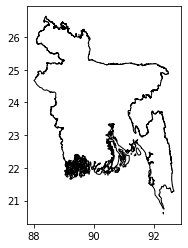

In [164]:
# Import a bounadary .dbf file of the Bangladesh

bound = gpd.read_file("bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm0_bbs_20201113.dbf")
bound.plot(color = "white",edgecolor = 'black')

Text(0.5, 1.0, 'The location of the class1 drought')

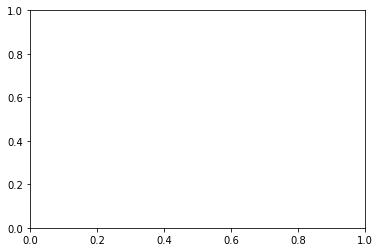

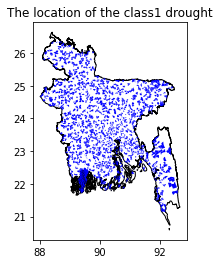

In [173]:
# Marker plotting of the class1 data, in which, background map is the Boundary map of Bangladesh

f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class1.plot(ax = base,marker = '*',color = 'b',markersize = 1)
plt.title("The location of the class1 drought")

Text(0.5, 1.0, 'The location of the class2 drought')

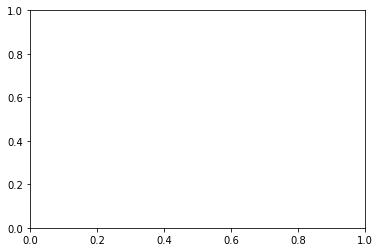

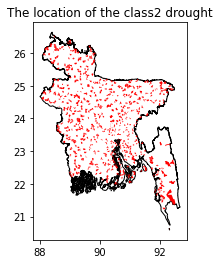

In [172]:
# Marker plotting of the class2 data, in which, background map is the Boundary map of Bangladesh
f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class2.plot(ax = base,marker = 'o',color = 'red',markersize = 1)
plt.title("The location of the class2 drought")

Text(0.5, 1.0, 'The location of the class3 drought')

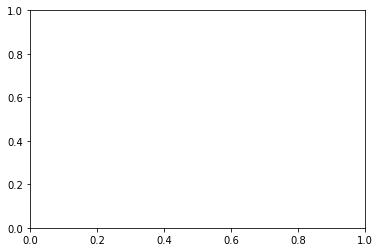

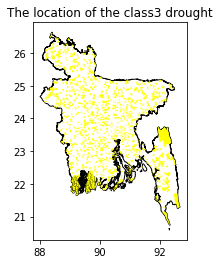

In [175]:
# Marker plotting of the class3 data, in which, background map is the Boundary map of Bangladesh
f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class3.plot(ax = base,marker = 'o',color = 'yellow',markersize = 1)
plt.title("The location of the class3 drought")

Text(0.5, 1.0, 'The location of the class4 drought')

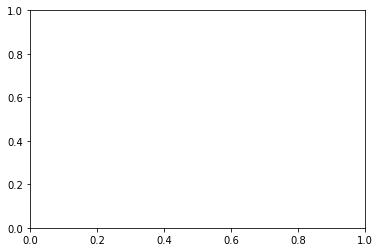

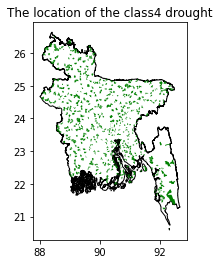

In [176]:
# Marker plotting of the class4 data, in which, background map is the Boundary map of Bangladesh
f,ax = plt.subplots(1,1)
base = bound.plot(color = "white",edgecolor = 'black')
class2.plot(ax = base,marker = 'o',color = 'green',markersize = 1)
plt.title("The location of the class4 drought")